In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# EXPLORATORY

In [2]:
df = pd.read_csv('data_car.csv')
df.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Check Data

In [4]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


Rename


In [5]:
df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Engine Fuel Type": "Fuel Type",
    "Transmission Type": "Transmission",
    "MSRP": "Price",
    "Vehicle Size": "Size",
    "Vehicle Style": "Style",
    "Number of Doors": "Doors",
    "highway MPG" : "MPG"
}, inplace=True)
df.head(5)

,Make,Model,Year,Fuel Type,HP,Cylinders,Transmission,Driven_Wheels,Doors,Market Category,Size,Style,MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Dropping

In [6]:
df = df.drop(columns=['Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors'], axis=1, errors='ignore')
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,Doors,Size,Style,MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


Dropping  **duplicate**

In [7]:
df.shape

(11914, 14)

In [8]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape)

Number of duplicate rows: (791, 14)


In [9]:
df.count()

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Driven_Wheels,11914
Doors,11908
Size,11914
Style,11914


In [10]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,Doors,Size,Style,MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [11]:
df.count()

,0
Make,11123
Model,11123
Year,11123
HP,11054
Cylinders,11093
Transmission,11123
Driven_Wheels,11123
Doors,11117
Size,11123
Style,11123


Dropping missing vaalue

In [12]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
Doors             6
Size              0
Style             0
MPG               0
city mpg          0
Popularity        0
Price             0
dtype: int64


In [13]:
df = df.dropna()
df.count()

,0
Make,11024
Model,11024
Year,11024
HP,11024
Cylinders,11024
Transmission,11024
Driven_Wheels,11024
Doors,11024
Size,11024
Style,11024


In [14]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
Doors            0
Size             0
Style            0
MPG              0
city mpg         0
Popularity       0
Price            0
dtype: int64


MENDETEKSI NILAI OUTLIERS

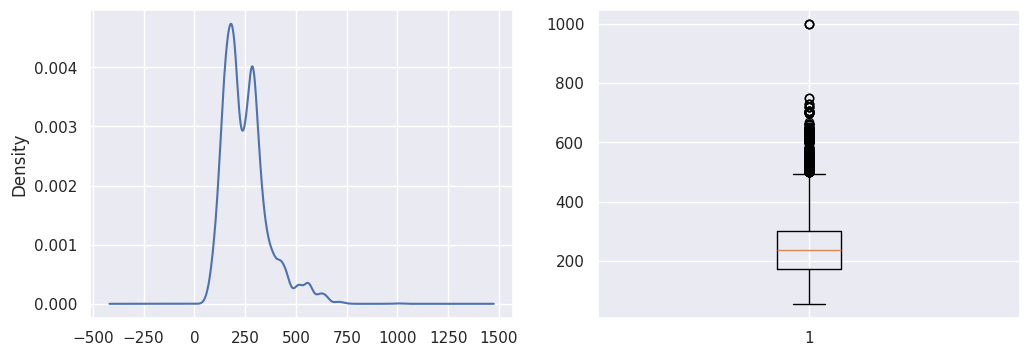

In [15]:
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 2, 1)
df['HP'].plot(kind='kde')
f.add_subplot(1, 2, 2)
plt.boxplot(df['HP'])
plt.show()

<Axes: xlabel='MPG'>

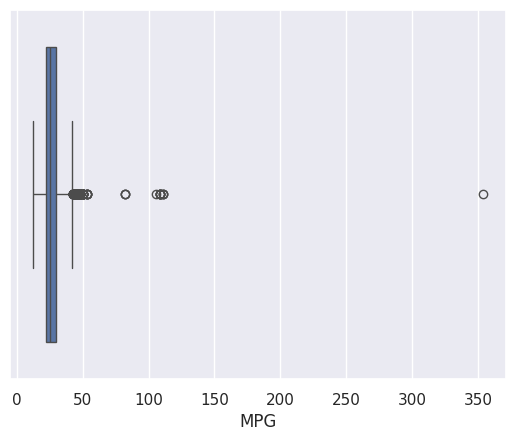

In [16]:
sns.boxplot(x=df['MPG'])

<Axes: xlabel='HP'>

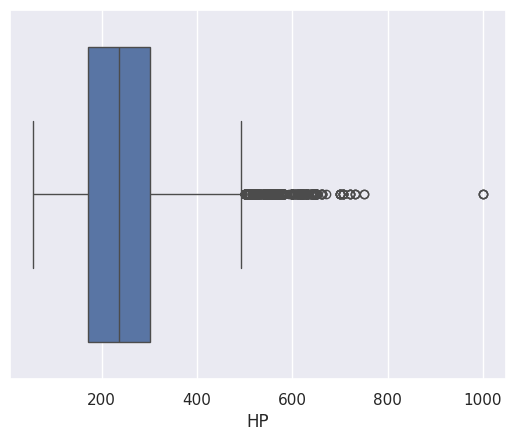

In [17]:
sns.boxplot(x=df['HP'])


<Axes: xlabel='Cylinders'>

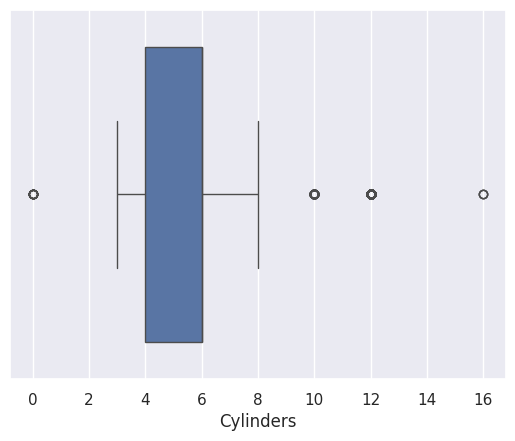

In [18]:
sns.boxplot(x=df['Cylinders'])

note: untuk mengubah dari type data kategori ke numerik dengan menggunakan one hot and coding

NORMALISASI DATA OUTLIER
ADA BEBERAPA:
1. DISKRITISASI(pengelompokkan)
2. Normalisasi (menggunakan minmax scaler, feature scalling)

#ANALISIS UNIVARIATE
HISTOGRAM

In [19]:
df.Price.describe()

,Price
count,1.102400e+04
mean,4.184653e+04
std,6.189020e+04
min,2.000000e+03
25%,2.147500e+04
50%,3.049500e+04
75%,4.290125e+04
max,2.065902e+06


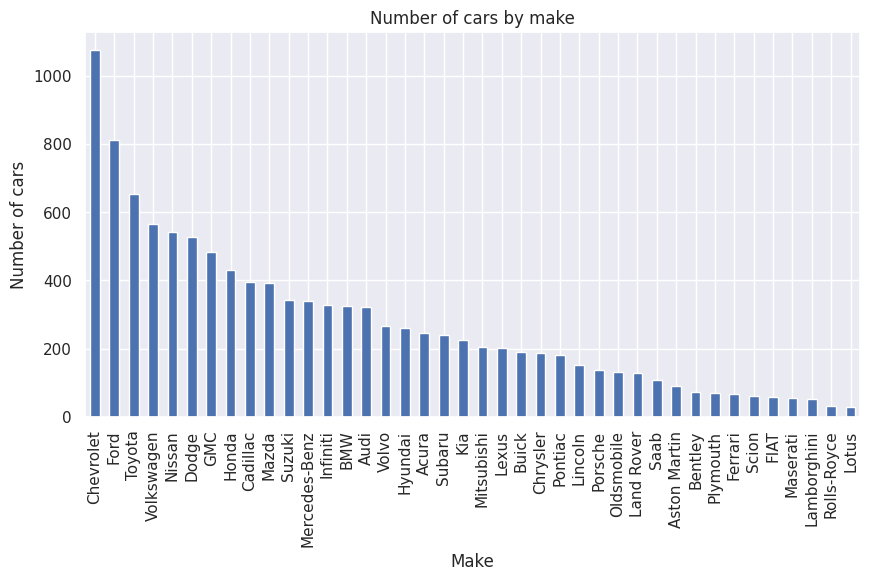

In [20]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

# ANALISISI BIVARIATE
HEAT MAPS

menganalisis korelasi antara 2 atribut

,Year,HP,Cylinders,Doors,MPG,city mpg,Popularity,Price
Year,1.000000,0.334194,-0.032973,0.244380,0.272416,0.225331,0.086131,0.209503
HP,0.334194,1.000000,0.786367,-0.133671,-0.418679,-0.471137,0.041290,0.661187
Cylinders,-0.032973,0.786367,1.000000,-0.152598,-0.611207,-0.631980,0.041063,0.554342
Doors,0.244380,-0.133671,-0.152598,1.000000,0.120902,0.140669,-0.059687,-0.146847
MPG,0.272416,-0.418679,-0.611207,0.120902,1.000000,0.841902,-0.023439,-0.208040
city mpg,0.225331,-0.471137,-0.631980,0.140669,0.841902,1.000000,-0.005971,-0.232765
Popularity,0.086131,0.041290,0.041063,-0.059687,-0.023439,-0.005971,1.000000,-0.047499
Price,0.209503,0.661187,0.554342,-0.146847,-0.208040,-0.232765,-0.047499,1.000000


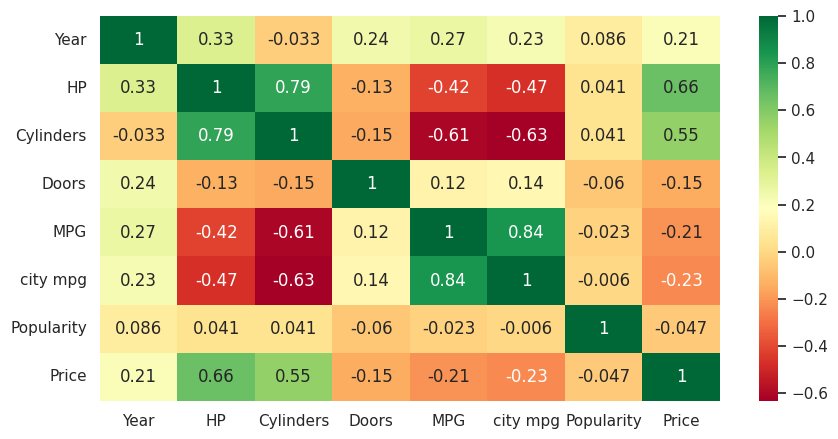

In [21]:
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=np.number)
c= numeric_df.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

SCATTERPLOT

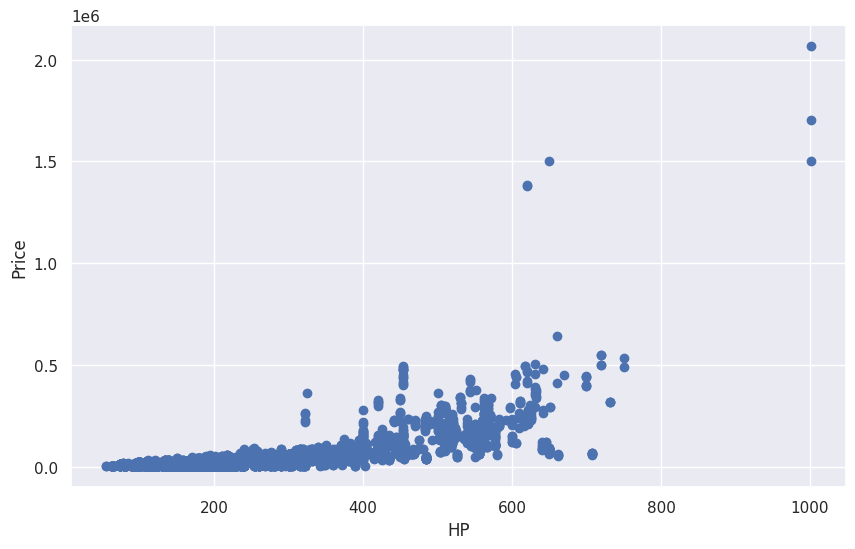

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

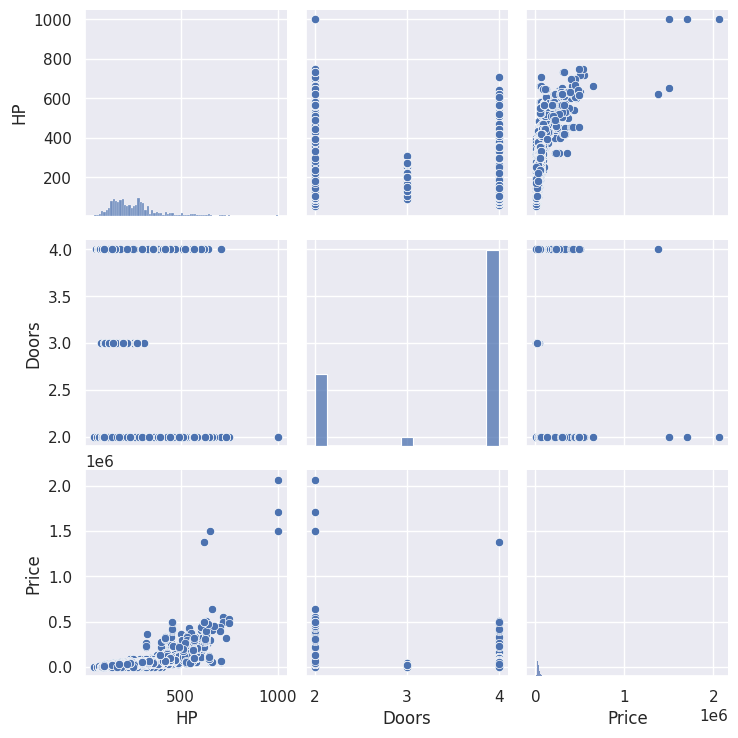

In [23]:
sns.pairplot(data = df, vars=['HP','Doors', 'Price'])
plt.show()

CORRELATION MATRIX

In [24]:
df[['HP', 'Price']].corr()

,HP,Price
HP,1.000000,0.661187
Price,0.661187,1.000000


 MULTIVARIATE
analisis korelasi dengan 3 atau lebih atribut

Doors                       2.0           3.0           4.0
Transmission                                               
AUTOMATED_MANUAL  170765.946429  20800.000000  44689.229323
AUTOMATIC          60585.049541  20796.513072  39571.982579
DIRECT_DRIVE                NaN           NaN  33620.000000
MANUAL             36246.289084  12896.136364  18108.794872
UNKNOWN             3797.636364           NaN   2000.000000


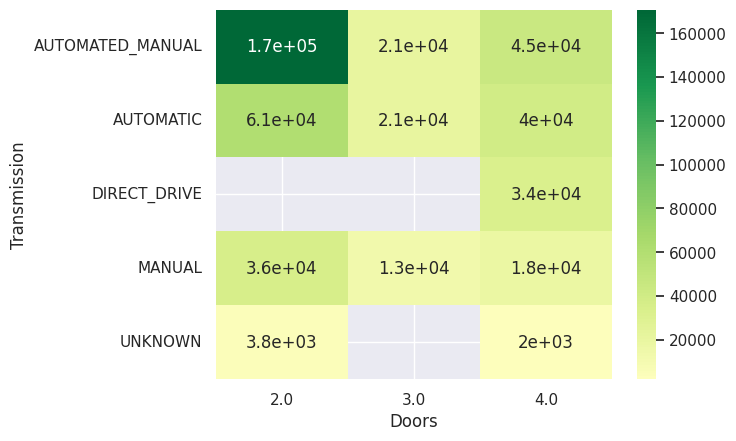

In [25]:
result = pd.pivot_table(data=df, index='Transmission', columns='Doors', values='Price')
print(result)

sns.heatmap(result, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

# NORMALIZATION MIN-MAX

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
data = pd.read_csv('datasetgaji2.csv')

In [41]:
print (data)

             Nama Status Rumah  Gaji Orang Tua  Umur
0      aldi taher      Kontrak         2100000    24
1          kekeyi        Milik         4000000    23
2   rangga sasana      Kontrak         1400000    21
3  vicky prasetyo      Kontrak          700000    28
4            Zuko        Milik          650000    27
5           dyrga      Kontrak          450000    22


In [42]:
scaler = MinMaxScaler()

In [43]:
scaled = scaler.fit_transform(data[['Gaji Orang Tua', 'Umur']]  )

In [44]:
print (scaled)

[[0.46478873 0.42857143]
 [1.         0.28571429]
 [0.26760563 0.        ]
 [0.07042254 1.        ]
 [0.05633803 0.85714286]
 [0.         0.14285714]]


Data standarization

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [57]:
scaled = scaler.fit_transform(data[['Gaji Orang Tua', 'Umur']]  )

In [59]:
print (scaled)

[[ 0.44733685 -0.06551218]
 [ 1.99268231 -0.45858525]
 [-0.12200096 -1.24473139]
 [-0.69133876  1.5067801 ]
 [-0.73200575  1.11370703]
 [-0.89467369 -0.85165832]]


BINNING DENGAN KETENTUAN SENDIRI

In [61]:
from sklearn.pipeline import Pipeline


In [63]:
data = pd.read_csv('datasetgaji2.csv', sep=',')
data.head(6)

,Nama,Status Rumah,Gaji Orang Tua,Umur
0,aldi taher,Kontrak,2100000,24
1,kekeyi,Milik,4000000,23
2,rangga sasana,Kontrak,1400000,21
3,vicky prasetyo,Kontrak,700000,28
4,Zuko,Milik,650000,27
5,dyrga,Kontrak,450000,22


In [65]:
batas_bin =[0,1400000, 40000000]

In [67]:
kategori =['kecil', 'Besar']

In [69]:
data['gaji_binned_1'] = pd.cut(data['Gaji Orang Tua'],  bins=batas_bin, labels=kategori  )

In [70]:
print (data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1
0      aldi taher      Kontrak         2100000    24         Besar
1          kekeyi        Milik         4000000    23         Besar
2   rangga sasana      Kontrak         1400000    21         kecil
3  vicky prasetyo      Kontrak          700000    28         kecil
4            Zuko        Milik          650000    27         kecil
5           dyrga      Kontrak          450000    22         kecil


BINNING MENGGUNAKAN LINDSPACE

In [71]:
bins = np.linspace(min(data['Gaji Orang Tua']), max(data['Gaji Orang Tua']), 3)


In [72]:
print (bins)

[ 450000. 2225000. 4000000.]


In [74]:
kategori= ['kecil', 'besar']

In [75]:
data['gaji_binned2'] = pd.cut(data['Gaji Orang Tua'], bins=bins, labels=kategori, include_lowest=True)

In [76]:
print (data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         kecil   
3  vicky prasetyo      Kontrak          700000    28         kecil   
4            Zuko        Milik          650000    27         kecil   
5           dyrga      Kontrak          450000    22         kecil   

  gaji_binned2  
0        kecil  
1        besar  
2        kecil  
3        kecil  
4        kecil  
5        kecil  


BINNING DENGAN QUANTILE

In [79]:
data['gaji_binned3'] = pd.qcut(data['Gaji Orang Tua'], 2)
print (data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         kecil   
3  vicky prasetyo      Kontrak          700000    28         kecil   
4            Zuko        Milik          650000    27         kecil   
5           dyrga      Kontrak          450000    22         kecil   

  gaji_binned2             gaji_binned3  
0        kecil   (1050000.0, 4000000.0]  
1        besar   (1050000.0, 4000000.0]  
2        kecil   (1050000.0, 4000000.0]  
3        kecil  (449999.999, 1050000.0]  
4        kecil  (449999.999, 1050000.0]  
5        kecil  (449999.999, 1050000.0]  


In [80]:
kategori =['kecil', 'besar']
data['gaji_binned3'] = pd.qcut(data['Gaji Orang Tua'], 2, labels=kategori)
print (data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         kecil   
3  vicky prasetyo      Kontrak          700000    28         kecil   
4            Zuko        Milik          650000    27         kecil   
5           dyrga      Kontrak          450000    22         kecil   

  gaji_binned2 gaji_binned3  
0        kecil        besar  
1        besar        besar  
2        kecil        besar  
3        kecil        kecil  
4        kecil        kecil  
5        kecil        kecil  
